In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import glob
import os
from matplotlib.dates import MonthLocator, DateFormatter
import seaborn as sns
import plotly.express as px
import simpful as sf
from simpful import *

In [2]:
at_eur_1h = pd.read_csv('indicators_eurusd_1h.csv')

In [3]:
at_eur_1h

,id,name,Open,Close,High,Low,data_volume,data_datetime,timeframe,Name,...,15MA,12Ewm,26Ewm,MACD,low_14,high_14,k_percent,B_MA,BU,BL
0,41482,EURUSD,1.06074,1.06056,1.06083,1.05995,0.0,2023-03-16 06:00:00.000,1h,EURUSD,...,1.062542,1.064645,1.065467,-0.000822,1.05425,1.07463,30.961727,1.064059,1.075502,1.052616
1,41512,EURUSD,1.06297,1.06262,1.06334,1.06122,0.0,2023-03-17 12:00:00.000,1h,EURUSD,...,1.062684,1.064334,1.065256,-0.000922,1.05425,1.07463,41.069676,1.063649,1.074653,1.052646
2,41537,EURUSD,1.07050,1.07238,1.07308,1.07030,0.0,2023-03-20 13:00:00.000,1h,EURUSD,...,1.063378,1.065572,1.065784,-0.000212,1.05425,1.07463,88.959764,1.063734,1.074986,1.052481
3,41562,EURUSD,1.07777,1.07741,1.07798,1.07608,0.0,2023-03-21 14:00:00.000,1h,EURUSD,...,1.064849,1.067393,1.066645,0.000748,1.05425,1.07798,97.597977,1.064398,1.077209,1.051587
4,41592,EURUSD,1.08650,1.08551,1.08655,1.08546,0.0,2023-03-22 20:00:00.000,1h,EURUSD,...,1.066653,1.070180,1.068042,0.002138,1.05425,1.08655,96.780186,1.065230,1.081066,1.049393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5294,67712,EURUSD,1.06960,1.07016,1.07051,1.06901,0.0,2023-11-13 18:00:00.000,1h,EURUSD,...,1.068834,1.069131,1.069200,-0.000069,1.06651,1.07058,89.680590,1.069726,1.078503,1.060949
5295,67702,EURUSD,1.06991,1.06957,1.07061,1.06936,0.0,2023-11-13 17:00:00.000,1h,EURUSD,...,1.068855,1.069198,1.069227,-0.000029,1.06651,1.07061,74.634146,1.069785,1.078540,1.061030
5296,67682,EURUSD,1.06730,1.06769,1.06801,1.06679,0.0,2023-11-13 14:00:00.000,1h,EURUSD,...,1.068812,1.068966,1.069114,-0.000147,1.06651,1.07061,28.780488,1.069747,1.078533,1.060960
5297,67698,EURUSD,1.06888,1.06992,1.07038,1.06852,0.0,2023-11-13 16:00:00.000,1h,EURUSD,...,1.068902,1.069113,1.069173,-0.000060,1.06651,1.07061,83.170732,1.069823,1.078586,1.061060


## Generate signals MA

In [8]:
def generate_signals(df):
    # Check if short-term moving average is greater than long-term moving average
    df['Signal'] = 0.0  
    
    # Replace 0.0 with 1.0 where short_mavg > long_movg
    df.loc[df['5MA'] > df['15MA'], 'Signal'] = 1.0

In [10]:
generate_signals(at_eur_1h)

,id,name,Open,Close,High,Low,data_volume,data_datetime,timeframe,Name,...,26Ewm,MACD,low_14,high_14,k_percent,B_MA,BU,BL,NMA,Signal
0,41482,EURUSD,1.06074,1.06056,1.06083,1.05995,0.0,2023-03-16 06:00:00.000,1h,EURUSD,...,1.065467,-0.000822,1.05425,1.07463,30.961727,1.064059,1.075502,1.052616,0.365141,1.0
1,41512,EURUSD,1.06297,1.06262,1.06334,1.06122,0.0,2023-03-17 12:00:00.000,1h,EURUSD,...,1.065256,-0.000922,1.05425,1.07463,41.069676,1.063649,1.074653,1.052646,0.435852,1.0
2,41537,EURUSD,1.07050,1.07238,1.07308,1.07030,0.0,2023-03-20 13:00:00.000,1h,EURUSD,...,1.065784,-0.000212,1.05425,1.07463,88.959764,1.063734,1.074986,1.052481,0.426245,1.0
3,41562,EURUSD,1.07777,1.07741,1.07798,1.07608,0.0,2023-03-21 14:00:00.000,1h,EURUSD,...,1.066645,0.000748,1.05425,1.07798,97.597977,1.064398,1.077209,1.051587,0.421624,1.0
4,41592,EURUSD,1.08650,1.08551,1.08655,1.08546,0.0,2023-03-22 20:00:00.000,1h,EURUSD,...,1.068042,0.002138,1.05425,1.08655,96.780186,1.065230,1.081066,1.049393,0.470594,1.0


In [15]:
at_eur_1h.describe().transpose().round(4)

,count,mean,std,min,25%,50%,75%,max
id,5299.0,46877.8322,8624.0706,28851.0000,41783.5000,43108.0000,44432.5000,68836.0000
Open,5299.0,1.0809,0.0167,1.0453,1.0682,1.0818,1.0927,1.1257
Close,5299.0,1.0809,0.0167,1.0452,1.0682,1.0819,1.0927,1.1257
High,5299.0,1.0816,0.0167,1.0466,1.0688,1.0827,1.0935,1.1276
Low,5299.0,1.0802,0.0167,1.0448,1.0676,1.0811,1.0921,1.1250
data_volume,5299.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Return,5299.0,-0.0000,0.0057,-0.0464,-0.0005,0.0000,0.0006,0.0586
Up,5299.0,0.0010,0.0039,0.0000,0.0000,0.0000,0.0006,0.0586
Down,5299.0,0.0010,0.0039,0.0000,0.0000,0.0000,0.0005,0.0464
avg_14up,5299.0,0.0010,0.0014,0.0000,0.0002,0.0004,0.0011,0.0130


## Fuzzy Moving Average Crossover Strategy

### NMA

In [23]:
def calculate_NMA(df):
    fast_ma = df['5MA']
    slow_ma = df['15MA']
    
    nma = 100 * ((fast_ma - slow_ma)/fast_ma)
    
    return nma

In [24]:
at_eur_1h['NMA'] = calculate_NMA(at_eur_1h)


`TriangleFuzzySet` creates a new triangular fuzzy set.

Parameters:

        a – universe of discourse coordinate of the leftmost vertex.

        b – universe of discourse coordinate of the upper vertex.

        c – universe of discourse coordinate of the rightmost vertex.

        term – string representing the linguistic term to be associated to the fuzzy set.





`set_variable(name, value)`

    Sets the numerical value of a variable to be aggregated.

    Parameters:

            name – name of the variables to be set.

            value – numerical value to be set.



`inference`(terms=None, subdivisions=1000, aggregation_function=<built-in function max>, ignore_errors=False, ignore_warnings=False, verbose=False)

    Performs the fuzzy inference, trying to automatically choose the correct inference engine.

    Parameters:

            terms – list of the names of the variables on which inference must be performed. If empty, all variables appearing in the consequent of a fuzzy rule are inferred.

            subdivisions – the number of integration steps to be performed for calculating fuzzy set area (default: 1000).

            aggregation_function – pointer to function used to aggregate fuzzy sets during Mamdani inference, default is max. Use Python sum function, or simpful’s probor function for sum and probabilistic OR, respectively.

            ignore_errors – True/False, toggles the raising of errors during the inference.

            ignore_warnings – True/False, toggles the raising of warnings during the inference.

            verbose – True/False, toggles verbose mode.

    Returns:

        a dictionary, containing as keys the variables’ names and as values their numerical inferred values.



In [25]:
# NMA - normalized SMA

min_ = at_eur_1h['NMA'].min()
max_ = at_eur_1h['NMA'].max()

FS = FuzzySystem()
# universe_of_discourse – a list of two elements, specifying min and max of the universe of discourse
TLV = AutoTriangle(3, terms=['low', 'medium', 'high'], universe_of_discourse=[min_NMA, max_NMA])
# name – string containing the name of the linguistic variable.
FS.add_linguistic_variable("NMA", TLV)

O1 = TriangleFuzzySet(min_NMA, min_NMA, 0, term="SELL")
O2 = TriangleFuzzySet(min_NMA, 0, max_NMA, term="HOLD")
O3 = TriangleFuzzySet(0, max_NMA, max_NMA, term="BUY")
FS.add_linguistic_variable("Signal", LinguisticVariable([O1, O2, O3], universe_of_discourse=[min_NMA, max_NMA]))
FS.add_rules([
    "IF (NMA IS low) THEN (Signal IS SELL)",
    "IF (NMA IS medium) THEN (Signal IS HOLD)",
    "IF (NMA IS high) THEN (Signal IS BUY)"
    ])

FS.set_variable("NMA", 0.5) 

tip = FS.inference()
print("Inference result:", tip)

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.11.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

Inference result: {'Signal': 0.004964191398575773}


## Fuzzy MACD strategy

### fuzzMACDInput

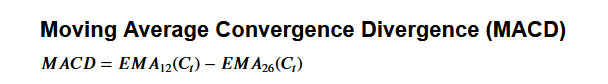

In [26]:
def fuzzyMACDInput(df):
    '''
    Przecięcie powyżej lini sygnałowej - kup
    Przecięcie poniżej lini sygnałowej - sprzedaj
    '''
    MACD = df['MACD']
    df['9Ewm'] = df.groupby('Name')['Close'].transform(lambda x: x.ewm(span=9, adjust=False).mean())

    SignalLine = df['9Ewm'] 
    fuzzMACD = 100 * ((MACD - SignalLine) / MACD)
        
    return fuzzMACD

In [27]:
at_eur_1h['fuzzMACD'] = fuzzyMACDInput(at_eur_1h)

In [28]:
at_eur_1h.fuzzMACD.describe()

count    5.299000e+03
mean     7.967607e+05
std      4.824950e+07
min     -3.639568e+08
25%     -1.261183e+05
50%      3.901496e+04
75%      1.462671e+05
max      3.395770e+09
Name: fuzzMACD, dtype: float64

In [29]:
FS = FuzzySystem()
# universe_of_discourse – a list of two elements, specifying min and max of the universe of discourse
TLV = AutoTriangle(3, terms=['low', 'medium', 'high'], universe_of_discourse=[-3.63, 3.39])

# name – string containing the name of the linguistic variable.
FS.add_linguistic_variable("fuzzMACD", TLV)

O1 = TriangleFuzzySet(-3.63, -3.63, 0, term="SELL")
O2 = TriangleFuzzySet(-3.63, 0, 3.39, term="HOLD")
O3 = TriangleFuzzySet(0, 3.39, 3.39, term="BUY")
FS.add_linguistic_variable("Signal", LinguisticVariable([O1, O2, O3], universe_of_discourse=[-3.63, 3.39]))

FS.add_rules([
    "IF (fuzzMACD IS low) THEN (Signal IS SELL)",
    "IF (fuzzMACD IS medium) THEN (Signal IS HOLD)",
    "IF (fuzzMACD IS high) THEN (Signal IS BUY)"
    ])

FS.set_variable("fuzzMACD", 0.5) 

tip = FS.inference()
print("Inference result:", tip)

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.11.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

Inference result: {'Signal': -0.03138883493441527}


In [52]:
pip install skfuzzy


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement skfuzzy (from versions: none)
ERROR: No matching distribution found for skfuzzy


## Fuzzy Bollinger Bands strategy

In [44]:
def fuzzyInputUpperBand(df):
    close = df['Close']
    upperBand = df['BU']
    fuzzUBollinger = 100 * ((close - upperBand)/close)
    return fuzzUBollinger
    
def fuzzyInputLowerBand(df):
    close = df['Close']
    lowerBand = df['BL']
    fuzzLBollinger = 100 * ((close - lowerBand)/close)
    return fuzzLBollinger


In [45]:
at_eur_1h['fuzz_U_Bollinger'] = fuzzyInputUpperBand(at_eur_1h)


at_eur_1h['fuzz_L_Bollinger'] = fuzzyInputLowerBand(at_eur_1h)
at_eur_1h.head()

,id,name,Open,Close,High,Low,data_volume,data_datetime,timeframe,Name,...,high_14,k_percent,B_MA,BU,BL,NMA,9Ewm,fuzzMACD,fuzz_U_Bollinger,fuzz_L_Bollinger
0,41482,EURUSD,1.06074,1.06056,1.06083,1.05995,0.0,2023-03-16 06:00:00.000,1h,EURUSD,...,1.07463,30.961727,1.064059,1.075502,1.052616,0.365141,1.060560,129180.267095,-1.408850,0.749010
1,41512,EURUSD,1.06297,1.06262,1.06334,1.06122,0.0,2023-03-17 12:00:00.000,1h,EURUSD,...,1.07463,41.069676,1.063649,1.074653,1.052646,0.435852,1.060972,115132.185942,-1.132361,0.938594
2,41537,EURUSD,1.07050,1.07238,1.07308,1.07030,0.0,2023-03-20 13:00:00.000,1h,EURUSD,...,1.07463,88.959764,1.063734,1.074986,1.052481,0.426245,1.063254,501317.326951,-0.243024,1.855606
3,41562,EURUSD,1.07777,1.07741,1.07798,1.07608,0.0,2023-03-21 14:00:00.000,1h,EURUSD,...,1.07798,97.597977,1.064398,1.077209,1.051587,0.421624,1.066085,-142433.290791,0.018700,2.396722
4,41592,EURUSD,1.08650,1.08551,1.08655,1.08546,0.0,2023-03-22 20:00:00.000,1h,EURUSD,...,1.08655,96.780186,1.065230,1.081066,1.049393,0.470594,1.069970,-49950.238401,0.409365,3.327220


## Fuzzy RSI strategy

In [60]:
def fuzzRSIone(df):
    RSI = df['RSI']
    fuzzRSIone = 100 * (RSI - 70)/RSI
    return fuzzRSIone
    
def fuzzRSItwo(df):
    RSI = df['RSI']
    fuzzRSItwo = 100 * (RSI - 30)/RSI
    return fuzzRSItwo


In [61]:
at_eur_1h['fuzzRSIone'] = fuzzRSIone(at_eur_1h)

at_eur_1h['fuzzRSItwo'] = fuzzRSItwo(at_eur_1h)

at_eur_1h.head()

,id,name,Open,Close,High,Low,data_volume,data_datetime,timeframe,Name,...,high_14,k_percent,B_MA,BU,BL,NMA,9Ewm,fuzzMACD,fuzzRSIone,fuzzRSItwo
0,41482,EURUSD,1.06074,1.06056,1.06083,1.05995,0.0,2023-03-16 06:00:00.000,1h,EURUSD,...,1.07463,30.961727,1.064059,1.075502,1.052616,0.365141,1.060560,129180.267095,-39.867711,40.056695
1,41512,EURUSD,1.06297,1.06262,1.06334,1.06122,0.0,2023-03-17 12:00:00.000,1h,EURUSD,...,1.07463,41.069676,1.063649,1.074653,1.052646,0.435852,1.060972,115132.185942,-38.792525,40.517489
2,41537,EURUSD,1.07050,1.07238,1.07308,1.07030,0.0,2023-03-20 13:00:00.000,1h,EURUSD,...,1.07463,88.959764,1.063734,1.074986,1.052481,0.426245,1.063254,501317.326951,-14.868965,50.770443
3,41562,EURUSD,1.07777,1.07741,1.07798,1.07608,0.0,2023-03-21 14:00:00.000,1h,EURUSD,...,1.07798,97.597977,1.064398,1.077209,1.051587,0.421624,1.066085,-142433.290791,-13.196395,51.487259
4,41592,EURUSD,1.08650,1.08551,1.08655,1.08546,0.0,2023-03-22 20:00:00.000,1h,EURUSD,...,1.08655,96.780186,1.065230,1.081066,1.049393,0.470594,1.069970,-49950.238401,-8.720474,53.405511


## Fuzzy Stochastic Oscilator

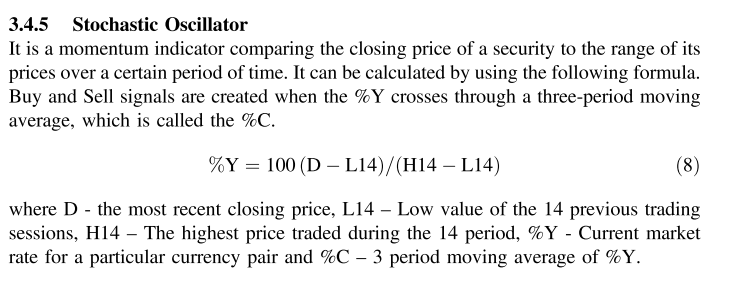

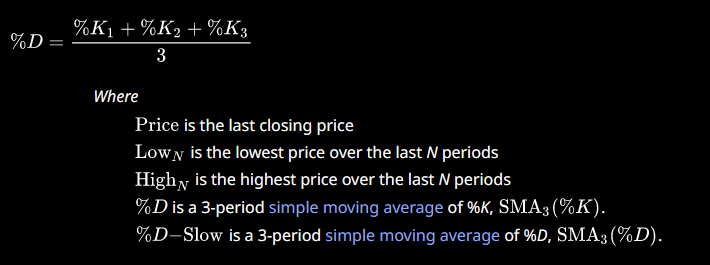

In [2]:
def fuzzStochastic(df):
    '''
    fuzzyStochastic = %Y - %C
    
    Stochastic oscilator %K - 'k_percent'
     %Y = %K
     %C = %D
    '''
    y = df['k_percent']
    c = df['']
    fuzzStochastic = y - c
    return fuzzStochastic

## Defuzzification

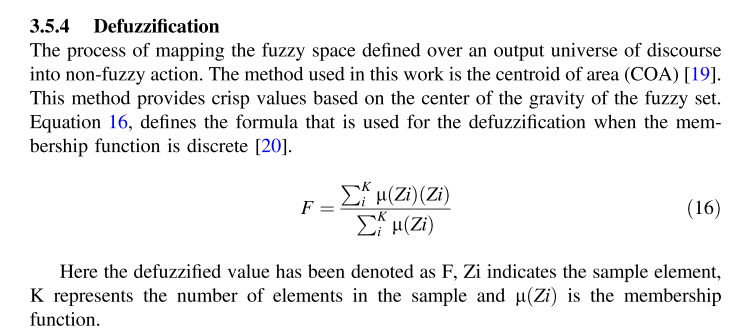